In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
mapping={'positive':1,'negative':0}

In [5]:
df['sentiment']=df['sentiment'].map(mapping)

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


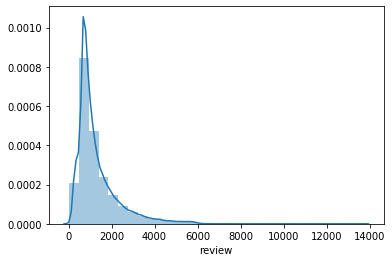

In [7]:
sns.distplot(df['review'].apply(len),bins=30)

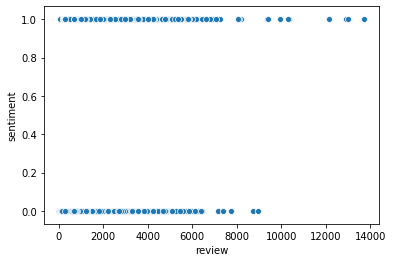

In [8]:
sns.scatterplot(df['review'].apply(len),df['sentiment'])

In [9]:
df.loc[df['review'].apply(len)>6000,['review','sentiment']]

,review,sentiment
556,I thought that ROTJ was clearly the best out o...,1
1531,Warning: Does contain spoilers.<br /><br />Ope...,1
3024,If anyone ever assembles a compendium on moder...,1
3654,*!!- SPOILERS - !!*<br /><br />Before I begin ...,1
3939,Warning: Spoilers Galore!<br /><br />Tim Burto...,0
5633,"'Heaven's Gate' is not a masterpiece, which ap...",1
5708,**Attention Spoilers**<br /><br />First of all...,1
6705,"""Spielberg loves the smell of sentiment in the...",0
7899,"Films belonging to the ""film noir"" genre usual...",1
8220,"Okay, so I'm not a big video game buff, but wa...",0


In [10]:
import re
regex=re.compile(r'\W\w*\s\W\W\w*\W\w*\s\W\W')

In [11]:
df.shape

(50000, 2)

In [12]:
for i in range(50000):
    found=regex.search(df['review'][i])
    if found:
        df['review'][i]=df['review'][i].replace(found.group(),'')

C:\Users\Aditya Rauthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
df.to_csv('new_reviews.csv',index=False)